# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [112]:
import pandas as pd
import numpy as np
#import geopandas as gpd --- не удалось установть под win
import sklearn.cluster as cls
import sklearn.metrics as mtx
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [113]:
df = pd.read_excel('geo_comment.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70382 entries, 0 to 70381
Data columns (total 5 columns):
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.2+ MB


In [114]:
df.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [115]:
df['comment_class'].value_counts()

-1    58552
 1    11830
Name: comment_class, dtype: int64

In [116]:
dfx = df[['x','y']]

In [119]:
# функция выводит рапределение кластеров
def draw_voites(model, ddfx, comap):
    cluster_labels = np.array(model.fit_predict(ddfx))
    ddfx['clst'] = cluster_labels
    plt.scatter(ddfx.x, ddfx.y, c=ddfx.clst, cmap=comap, s=60, alpha=0.1)
    plt.title(model.__class__.__name__)


In [120]:
# Распределение всех голосов

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


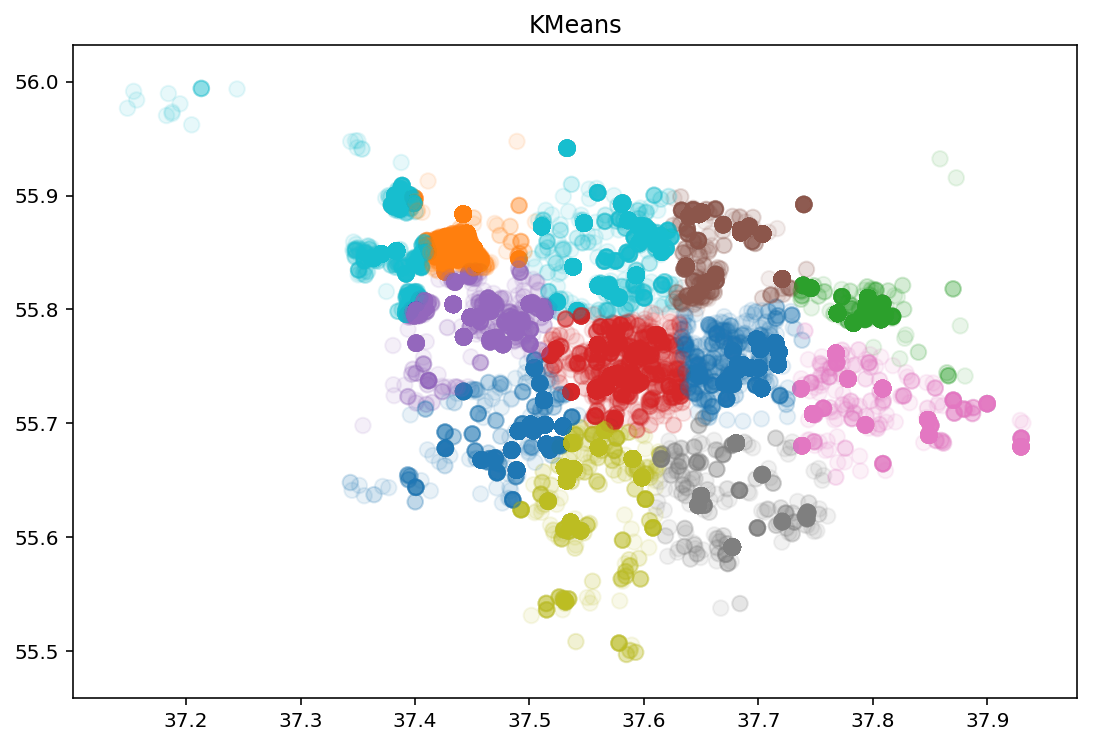

In [121]:
kmeans = cls.KMeans(n_clusters=12)
kmeans.fit(dfx)
draw_voites(kmeans, dfx, 'tab10')

In [122]:
# распределение тех, кто проголосовал "за"

In [123]:
dfx1 = df[df['comment_class']==1][['x','y']]

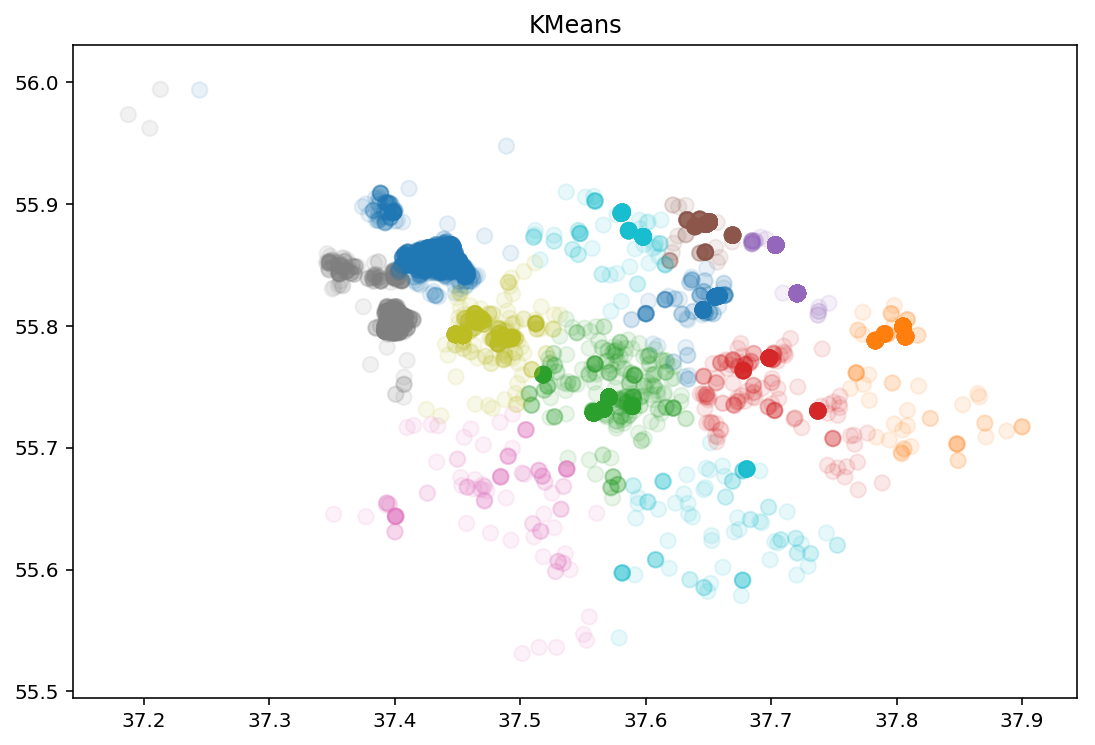

In [124]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(dfx1)
draw_voites(kmeans, dfx1, 'tab10')

In [125]:
# распределение тех, кто проголосовал "против"

In [126]:
dfx0 = df[df['comment_class']==-1][['x','y']]

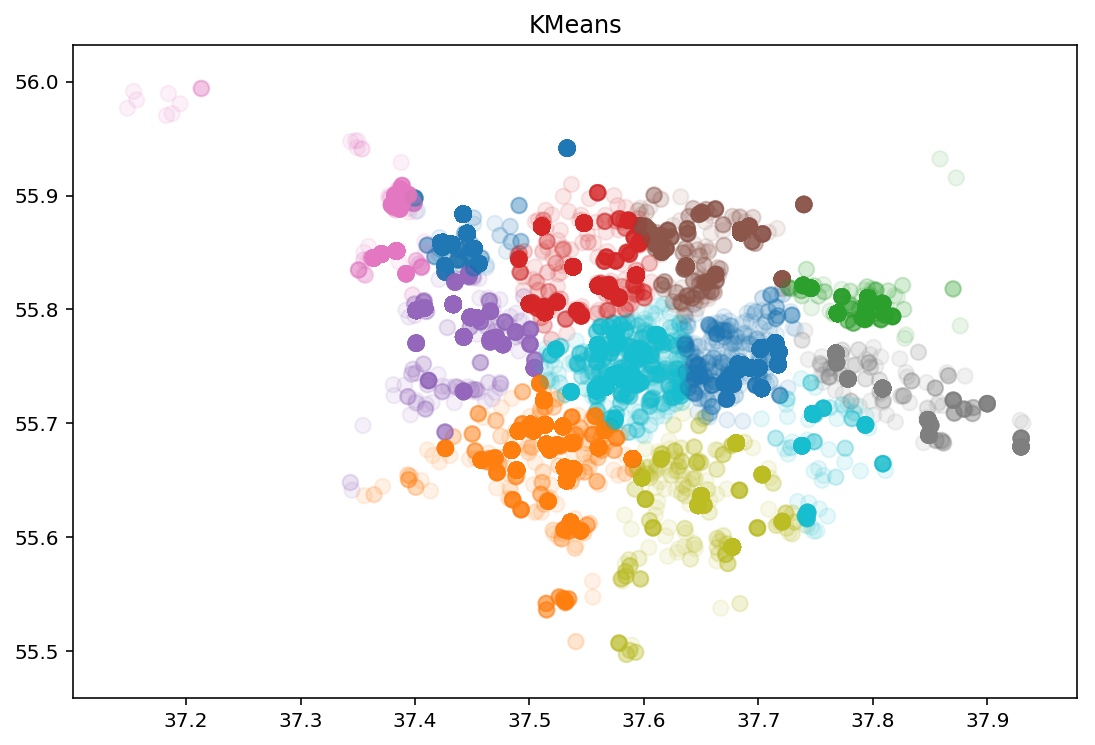

In [127]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(dfx0)
draw_voites(kmeans, dfx0, 'tab10')

In [128]:
# Подбор оптимального кол-ва кластеров:

In [129]:
dfx = df[['x','y']]
k_inertia = []
ks = range(1,12)

for k in ks:
    clf_kmeans = cls.KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(dfx)
    k_inertia.append(clf_kmeans.inertia_)

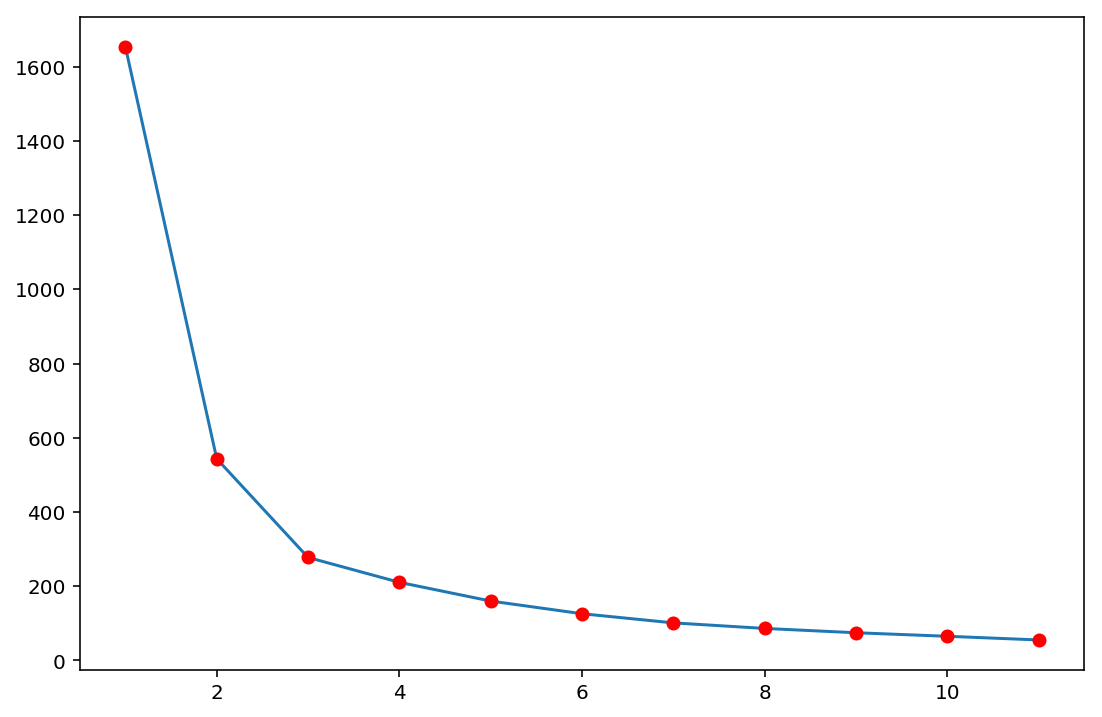

In [130]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [131]:
diff_r = [((c[0]-c[1])/c[0]) for c in zip(k_inertia[1:], k_inertia[:-1])]

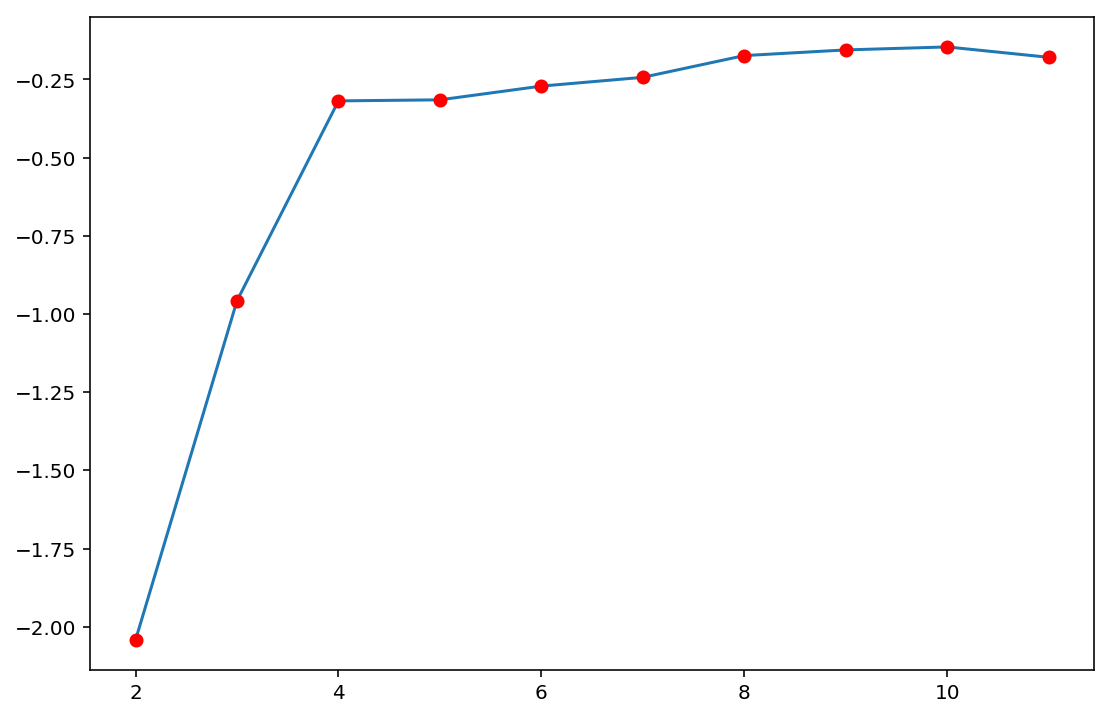

In [132]:
plt.plot(ks[1:], diff_r)
plt.plot(ks[1:], diff_r, 'ro')

In [133]:
k_opt = ks[np.argmin(np.abs(diff_r))+1]
print("Оптимальное кол-во кластеров: ", k_opt)

Оптимальное кол-во кластеров:  10


In [134]:
#Построим распределение с оптимальным кол-вом кластеров 
# Распределение всех голосов

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


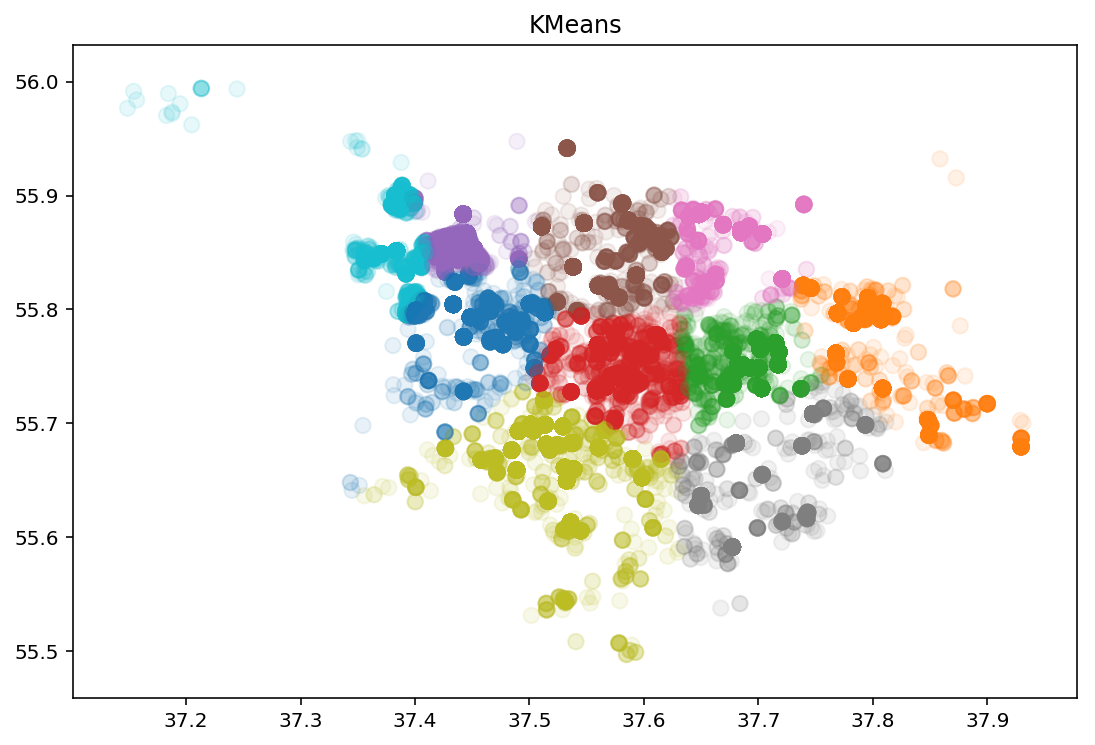

In [135]:
kmeans = cls.KMeans(n_clusters=k_opt)
kmeans.fit(dfx)
draw_voites(kmeans, dfx, 'tab10')

In [136]:
# распределение тех, кто проголосовал "за"

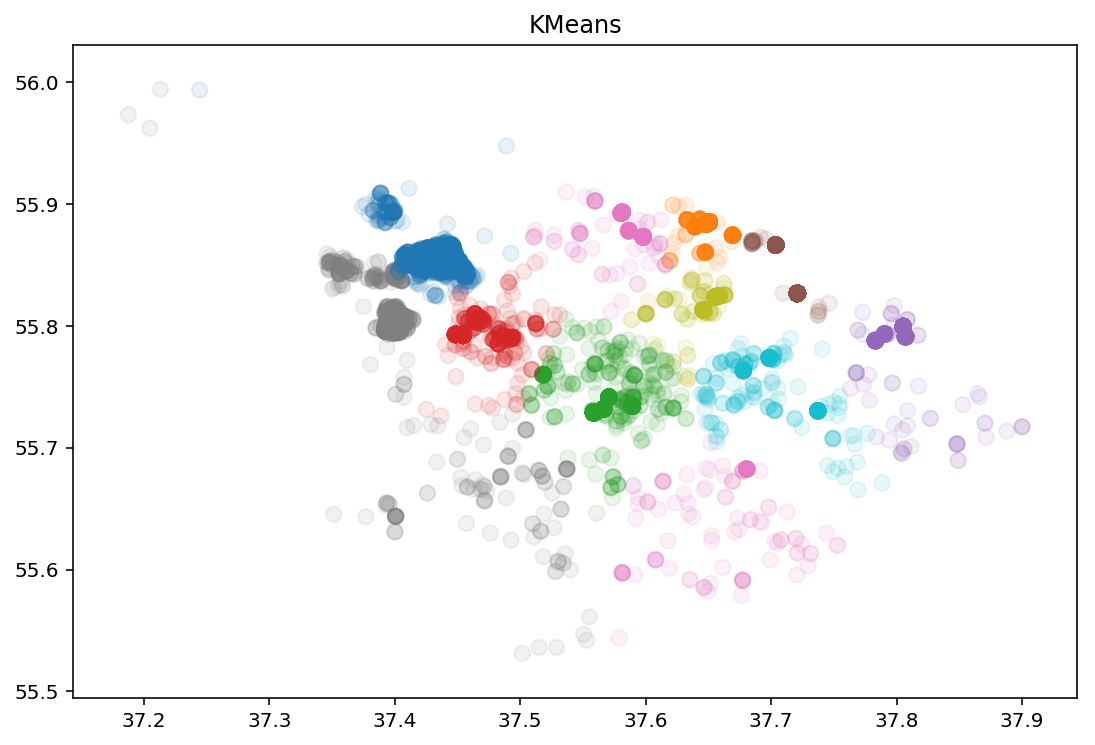

In [137]:
kmeans = KMeans(n_clusters=k_opt)
kmeans.fit(dfx1)
draw_voites(kmeans, dfx1, 'tab10')

In [138]:
# распределение тех, кто проголосовал "против"

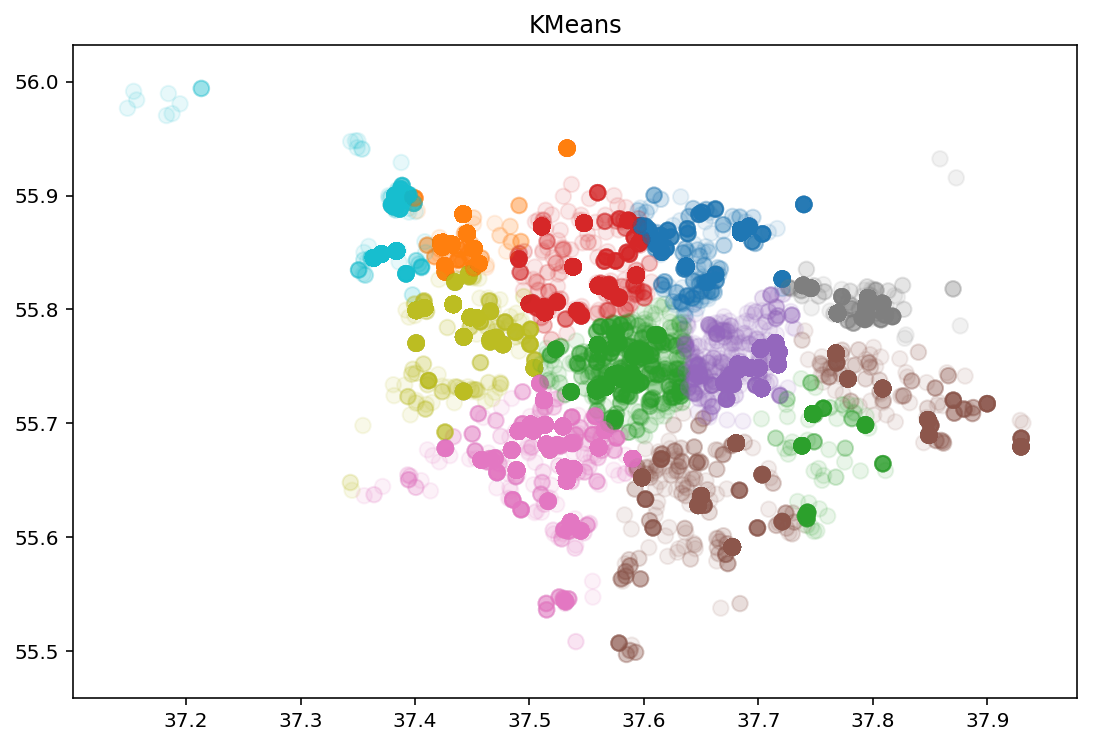

In [139]:
kmeans = KMeans(n_clusters=k_opt)
kmeans.fit(dfx0)
draw_voites(kmeans, dfx0, 'tab10')